**BANK CUSTOMER CHURN MODEL**

**Learning Objectives**
  1.   Data Encoding
  2.   Feature Scaling
  3.   Handling Imbalance Data

      a.   Random Under Sampling
      
      b.   Random Over Sampling
  4.   Support Vector Machine Classifier
  5.   Grid Search for Hyperparameter Tunning








Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [ ]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/f83fe655797d5d59f8c36d3df9fc09bd1fbfe4b4/Bank%20Churn%20Modelling.csv')

Analyse Data

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df=df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Encoding

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}}, inplace=True)

In [ ]:
df['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of CustomerId
15634602    Female
15647311    Female
15619304    Female
15701354    Female
15737888    Female
             ...  
15606229      Male
15569892      Male
15584532    Female
15682355      Male
15628319    Female
Name: Gender, Length: 10000, dtype: object>

In [ ]:
df.replace({'Gender':{'Male': 0, 'Female':1}}, inplace=True)

In [ ]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [ ]:
df.replace({'Num )f Products':{1:0,2:1,3:1,4:1}}, inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [ ]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [ ]:
df.loc[df['Balance']==0, 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

In [ ]:
df['Zero Balance'].hist

<bound method hist_series of CustomerId
15634602    0
15647311    1
15619304    1
15701354    0
15737888    1
           ..
15606229    0
15569892    1
15584532    0
15682355    1
15628319    1
Name: Zero Balance, Length: 10000, dtype: int64>

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

Define Label and Features

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X = df.drop(['Surname','Churn'], axis = 1 )

In [ ]:
y =df['Churn']

In [ ]:
X.shape, y.shape

((10000, 11), (10000,))

Handling Imbalance Data


In [ ]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

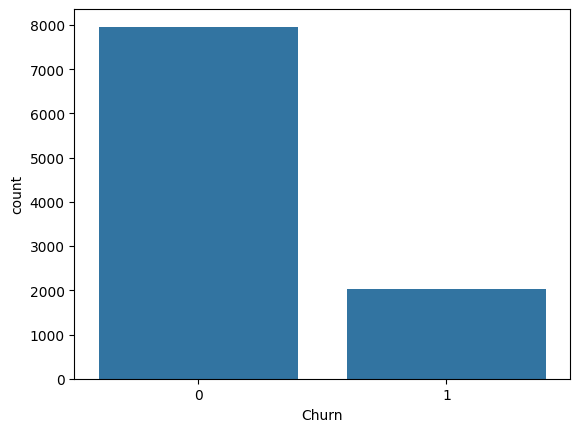

In [ ]:
sns.countplot(x='Churn', data=df);

In [ ]:
X.shape, y.shape

((10000, 11), (10000,))

Random Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=2529)

In [ ]:
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

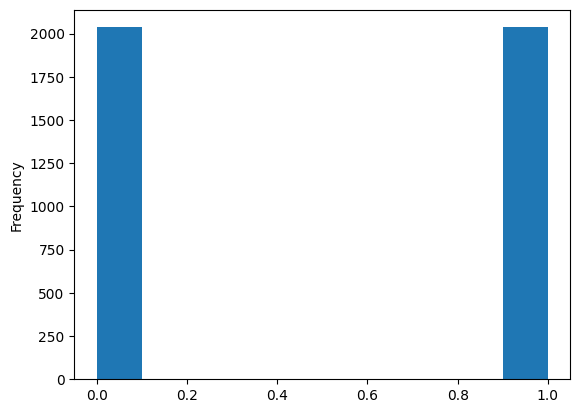

In [ ]:
y_rus.plot(kind='hist')

Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=2529)

In [ ]:
X_ros, y_ros = ros.fit_resample(X,y)

In [ ]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

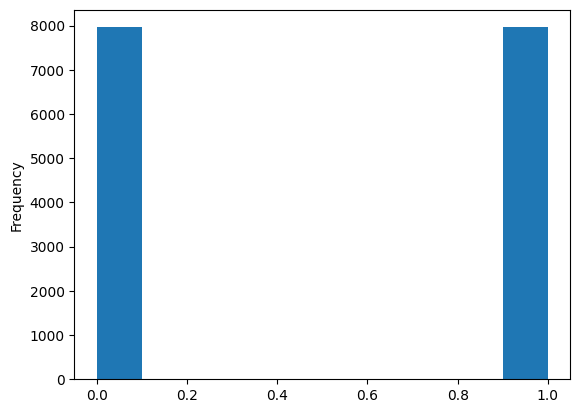

In [ ]:
y_ros.plot(kind = 'hist')

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

Split Orignal Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=2529)

Split Random Under Sample data

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X,y, test_size=0.3,random_state=2529)

Split Random Over Sample data

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X,y, test_size=0.3,random_state=2529)

Standardize Features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

Standardized Orignal Data

In [ ]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize Random Under Sample data

In [ ]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Standardize Random Over Sample data

In [ ]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

Support Vector Mahine classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)

Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2380,   34],
       [ 410,  176]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000



Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,10],
            'gamma' :[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight' :['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(y_test,grid_predictions_rus)

array([[2121,  293],
       [ 273,  313]])

In [ ]:
print(classification_report(y_test,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.52      0.53      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



***EXPLAINATION***

The provided notebook focuses on developing a machine learning model to predict bank customer churn. Here’s a detailed explanation:

### *BANK CUSTOMER CHURN MODEL*

#### *Learning Objectives:*
1. *Data Encoding* - Converting categorical data into numerical form.
2. *Feature Scaling* - Standardizing the range of independent variables.
3. *Handling Imbalanced Data*:
   - *Random Under Sampling* - Reducing the number of majority class samples.
   - *Random Over Sampling* - Increasing the number of minority class samples.
4. *Support Vector Machine Classifier* - Training the model using SVM.
5. *Grid Search for Hyperparameter Tuning* - Finding the best parameters for the model.

### *Steps Involved:*

1. *Import Libraries*: The necessary libraries like NumPy, pandas, matplotlib, seaborn, etc., are imported.

2. *Import Data*: The dataset is read from a URL into a pandas DataFrame.

3. *Analyze Data*: Initial data analysis includes displaying the first few rows and checking for duplicate entries.

4. *Data Encoding*:
   - Convert categorical variables like 'Geography' and 'Gender' into numerical values.
   - Replace the number of products with binary values indicating if the number of products is greater than one.
   - Create a new column 'Zero Balance' to indicate if the balance is zero.

5. *Define Label and Features*:
   - Separate the features (independent variables) from the label (dependent variable, 'Churn').

6. *Handling Imbalanced Data*:
   - Visualize the imbalance in the dataset.
   - Apply random under-sampling and over-sampling to balance the classes.

7. *Train-Test Split*:
   - Split the data into training and testing sets for original, under-sampled, and over-sampled datasets.

8. *Standardize Features*:
   - Apply standard scaling to the features to bring them to a similar scale.

9. *Support Vector Machine Classifier*:
   - Train the SVM classifier on the training data.
   - Evaluate the model's accuracy using the test data.

10. *Model Accuracy*:
    - Generate and print the confusion matrix and classification report to assess model performance.

11. *Hyperparameter Tuning*:
    - Use GridSearchCV to find the best parameters for the SVM model.
    - Evaluate the tuned model using the test data.

This explanation provides a high-level understanding of the steps involved in the notebook for predicting bank customer churn.